In [2]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [3]:
avocado=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/avocado_mean.csv')

In [4]:
avocado

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.
- **Как делать это задание?**
    
    Посчитайте скользящее среднее с помощью метода `rolling`, а потом возьмите максимум от получившейся серии
    
- **Как посчитать скользящее среднее?**
    
    Для этого примените метод `rolling` c желаемым размером окна к колонке, от которой вы хотите его получить. После его вызова примените метод `mean`
    
    Например,
    
    ```python
    df.column1.rolling(10).mean()
    ```
    
    Посчитает скользящее среднее от колонки `column1` с окном `10`

In [11]:
avocado.AveragePrice.rolling(3).mean().round(2)
#Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window), 
#посчита с пощью мето mean и округлить до 2х знаков после запятой

0       NaN
1       NaN
2      1.35
3      1.39
4      1.35
       ... 
164    1.35
165    1.36
166    1.35
167    1.33
168    1.33
Name: AveragePrice, Length: 169, dtype: float64

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.
- **Как делать это задание?**
    
    Постройте графики для скользящих средних с разным размером окна, построенных на исходных данных. Потом соотнесите ваши графики с известным размером окна и графики на стэпике
    
- **Как посчитать скользящее среднее?**
    
    Для этого примените метод `rolling` c желаемым размером окна к колонке, от которой вы хотите его получить. После его вызова примените метод `mean`
    
    Например,
    
    ```python
    df.column1.rolling(10).mean()
    ```
    
    Посчитает скользящее среднее от колонки `column1` с окном `10`
    
- **График с линиями**
    
    Воспользуйтесь функцией `sns.lineplot`, принимающей колонку значений для оси x и колонку значений для оси y
    
    Например,
    
    ```python
    sns.lineplot(df.abscissa, df.ordinata)
    ```
    
    Построит график где, точки с соответствующими координатами из колонок `abscissa` и `ordinata` будут соединены линией

In [12]:
avocado.AveragePrice.rolling(3).mean().round(2)

0       NaN
1       NaN
2      1.35
3      1.39
4      1.35
       ... 
164    1.35
165    1.36
166    1.35
167    1.33
168    1.33
Name: AveragePrice, Length: 169, dtype: float64

In [13]:
ax = avocado.groupby(['Date'])\
    .agg({'AveragePrice': 'mean'})\
    .rename(columns={'AveragePrice': 'AveragePrice_rolling'})\
    .sort_values('Date')\
    .rolling(3).mean()

In [14]:
ax

,AveragePrice_rolling
Date,
2015-01-04,NaN
2015-01-11,NaN
2015-01-18,1.354352
2015-01-25,1.386296
2015-02-01,1.345093
...,...
2018-02-25,1.346914
2018-03-04,1.361296
2018-03-11,1.348302


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


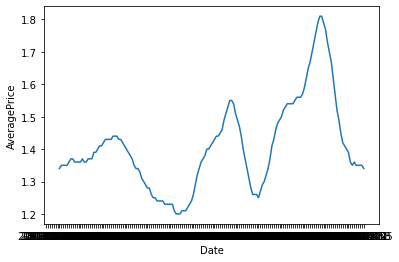

In [15]:
sns.lineplot(avocado.Date, avocado.AveragePrice.rolling(10).mean().round(2))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


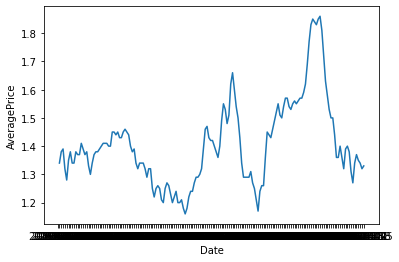

In [5]:
sns.lineplot(avocado.Date, avocado.AveragePrice.rolling(2).mean().round(2))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


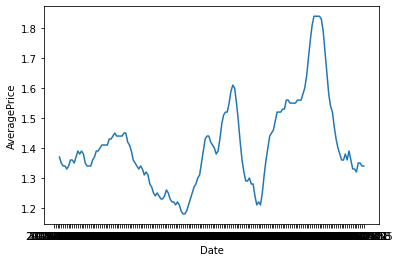

In [6]:
sns.lineplot(avocado.Date, avocado.AveragePrice.rolling(4).mean().round(2))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


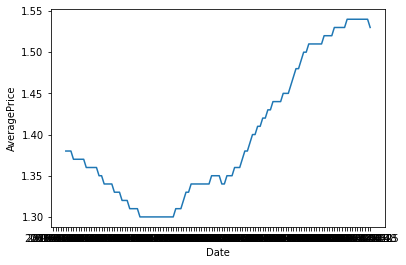

In [8]:
sns.lineplot(avocado.Date, avocado.AveragePrice.rolling(50).mean().round(2))

Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

Данные записаны в avocado_mean
- **Применение** `ewm`
    
    Подсчёт среднего с помощью экспоненциально взвешенного окна не сильно отличается от аналогичного подсчёта с помощью `rolling` - примените метод `ewm` с желаемыми параметрами к колонке, от которой вы хотите получить среднее. После его вызова примените метод `mean`
    
    Например,
    
    ```python
    df.column1.ewm(halflife=0.3).mean()
    ```
    
    Посчитает скользящее среднее от колонки `column1` с окном c периодом полураспада `0.3`
    
- **У меня не принимает ответ!**
    
    А вы точно указали, что параметр `span` равен `2`, и поместили результат в переменную `avocado_ewm`?

In [16]:
avocado.AveragePrice.ewm(span=2).mean()

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [12]:
avocado_full=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/avocado_full.csv', index_col=0)

In [13]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.
- **Применение** `ewm`
    
    Подсчёт среднего с помощью экспоненциально взвешенного окна не сильно отличается от аналогичного подсчёта с помощью `rolling` - примените метод `ewm` с желаемыми параметрами к колонке, от которой вы хотите получить среднее. После его вызова примените метод `mean`
    
    Например,
    
    ```python
    df.column1.ewm(halflife=0.3).mean()
    ```
    
    Посчитает скользящее среднее от колонки `column1` с окном c периодом полураспада `0.3`
    
- **У меня не принимает ответ!**
    
    А вы точно указали, что параметр `span` равен `2`, и поместили результат в переменную `avocado_ewm`?

In [9]:
# avocado_full_full=avocado_full.query('type == "organic"')\
#                                 .query('region == "Chicago"')\
#                                 .rolling(window=4).mean().round(3)

In [10]:
# avocado_full_full.plot()

In [14]:
arganic_ch = avocado_full.loc[(avocado_full.type == 'organic') & (avocado_full.region == 'Chicago')]

In [15]:
arganic_ch

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


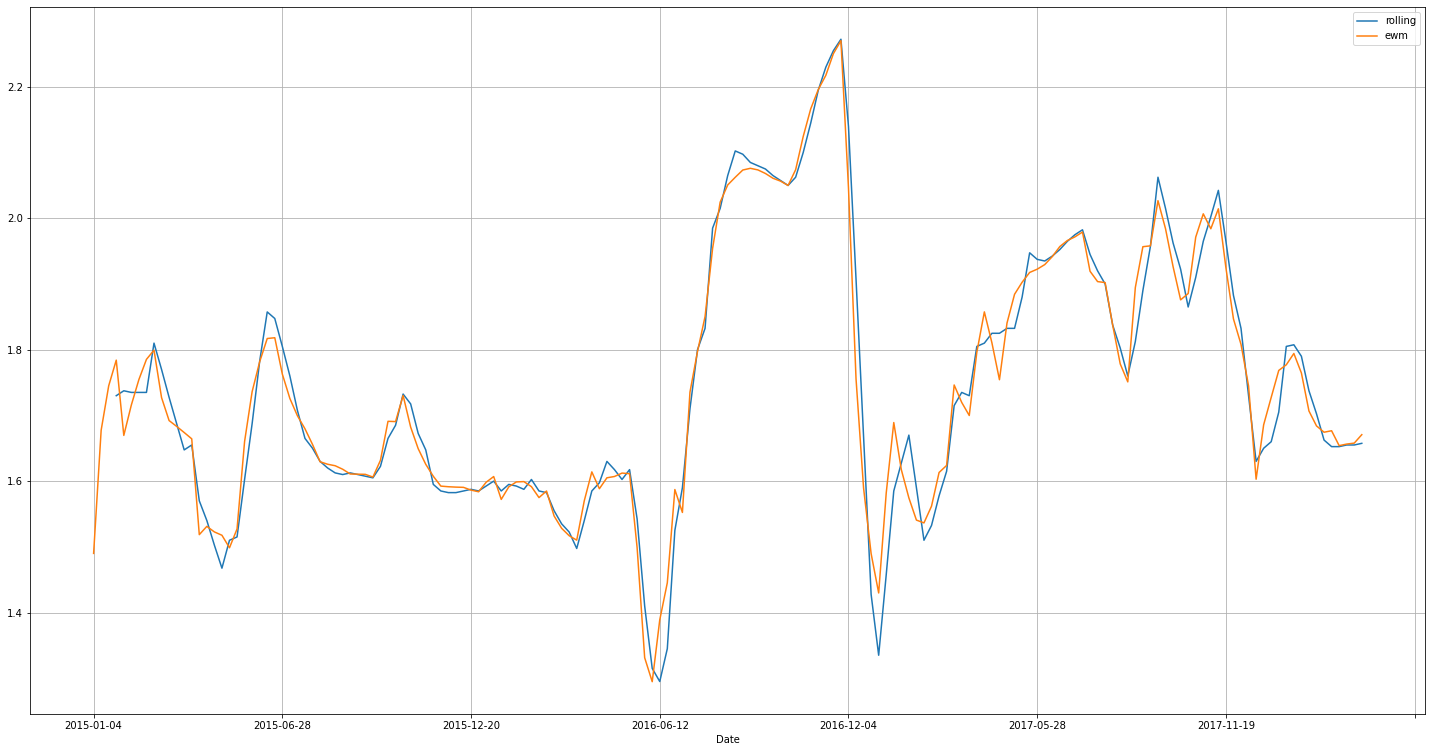

In [18]:
fig, ax = plt.subplots(figsize=(25, 13))
arganic_ch.AveragePrice.rolling(window=4).mean().plot(ax=ax, label='rolling')
arganic_ch.AveragePrice.ewm(span=4).mean().plot(ax=ax, label='ewm')
plt.legend()
plt.grid()

In [28]:
delays=pd.read_csv('~/delays.csv')

In [29]:
delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


💀 Сложное задание! 💀

Далее будем работать с данными по опозданиям в заключении сделок.

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Пример сабсэта данных:

client_id	company_id	delay	revenue
0	2389	4240	-1 days -14:57:48.000000000	705436
1	7614	9544	-4 days -02:14:23.000000000	859266
2	2052	2427	-0 days -06:08:57.000000000	812416
3	9635	8054	-0 days -23:40:19.000000000	162312
4	8154	5503	-1 days -13:21:53.000000000	658844
Прочитайте эти данные. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.
Могут понадобиться:

pd.to_timedelta()
pd.Series.str
- **Как делать это задание?**
    
    Уберите минусы в значениях в колонке delay, а потом переведите её в таймдельту с помощью функции `pd.to_timedelta`
    
- **Убирание минусов**
    
    Чтобы убрать минусы из строковой колонки, можно взять метод `replace`
    
    Например,
    
    ```python
    df.my_column.str.replace('worse', 'better')
    ```
    
    Вернёт серию, где все встречания строки `worse` заменены на `better`
    
    !Обратите внимание, что строковые методы находятся внутри атрибута `str`
    
- **А толку-то от реплэйса, мне же нужно убрать минусы!**
    
    Просто замените их на пустую строку. К примеру
    
    ```python
    df.my_column.str.replace('evil', '')
    ```
    
    Уберёт всё зло
    
- **Ошибка при вызове** `replace`
    
    А вы точно вызываете его через атрибут `str`? Вместо
    
    ```python
    df.column1.replace('1', '10')
    ```
    
    используйте
    
    ```python
    df.column1.str.replace('1', '10')
    ```
    
    Также убедитесь, что вызываете метод от строковой колонки
    
- **Перевод в** `timedelta`
    
    Для перевода колонки в `timedelta` используйте функцию `pd.to_timedelta`
    
    Например,
    
    ```python
    pd.to_timedelta(df.column1)
    ```
    
    Вернёт колонку, сконвертированную в тип `timedelta`

In [33]:
delays.delay=delays.delay.str.replace('-', '')

In [35]:
delays.delay = pd.to_timedelta(delays.delay)

In [39]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

Могут понадобится:

pd.cut()

In [38]:
delays['delay_categorical'] = pd.cut(delays.delay, 3)

💀 Сложное задание! 💀

Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
 'more than 3 days' – больше 3 дней
Например, для следующего примера:

client_id  company_id  delay            revenue
14345      54631       2 days 13:34:45  145345
54434      54834       1 days 08:26:00  453245
34905      49834       0 days 00:26:03  14543


результатом будет:

client_id  company_id  delay            revenue  delay_categorical
14345      54631       2 days 13:34:45  145345   2-3 days
54434      54834       1 days 08:26:00  453245   1-2 days
34905      49834       0 days 00:26:03  14543    less than 1 day


Подготовленные данные лежат в переменной df.



In [41]:
bins = [pd.to_timedelta(0, 'D'),
       pd.to_timedelta(1, 'D'),
       pd.to_timedelta(2, 'D'),
       pd.to_timedelta(3, 'D'),
       pd.to_timedelta(5, 'D')]
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
# что бы разбить границы, нам необходимо прописать их в ручную, каждую
# по этому создадим список bins где будут эти самые границы

In [43]:
delays['delay_categorical'] = pd.cut(delays.delay, bins, labels=labels)

In [44]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [47]:
delay = delays.delay_categorical.value_counts()
delay
#для постраения плотли бара создаём переменную считам значения

more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: delay_categorical, dtype: int64

In [1]:
px.bar(delay)
# строим интерактивный график

NameError: name 'px' is not defined